

1. Загрузка данных и первичный осмотр


In [176]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
#Загрузка учебного датасета
#файл
# df = pd.read_csv('/content/S02-hw-dataset.csv')
#ссылка
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'
df = pd.read_csv(url, sep=',')

In [178]:
#Вывод первых строк датасета
df.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [179]:
#Вывод информации о стобцах, какие есть
df.columns

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')

In [180]:
#Вывод подробной информации о стобцах, типах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [181]:
#Получить описательную статистику
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [182]:
#Получение моды данных (Встречается чаще всего)
df.mode()

,user_id,age,country,purchases,revenue
0,10.0,24.0,RU,6,0.0
1,NaN,NaN,NaN,7,NaN


2. Пропуски, дубликаты и базовый контроль качества

In [183]:
#Посчитать долю пропусков в каждом столбце
#isna() - поиск пропущенных значений
#mean() - среднее значение
df.isna().mean()

,0
user_id,0.00000
age,0.04878
country,0.00000
purchases,0.00000
revenue,0.00000


In [184]:
#Проверка наличия полностью дублирующих строк
#True означает, что строка является дубликатом,
#а False — что это уникальная строка (или первое вхождение)
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [185]:
#Подозрительные значения
#отрицательные значения в полях, где их не должно быть
check_negative = ['age', 'revenue', 'purchases'	]

for c in check_negative:
  print(c)
  df_wrong = df[c] < 0
  if df_wrong.sum() > 0:
    print(df[df_wrong])
  else:
    print('Все данные проходят данную проверку')

age
Все данные проходят данную проверку
revenue
Все данные проходят данную проверку
purchases
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [186]:
#нереалистичные значения
#Неверный возраст
df_wrong_age = df['age'] > 100
print('Неверный возраст > 100:')
if df_wrong_age.sum() > 0:
  print(df[df_wrong_age])
else:
  print('Все данные проходят данную проверку')

print()

#Неверный возраст, скорее всего, пользователь должен быть совершеннолетним (будем считать 18, но существуют странны с меньшим и большим возрастом сов.)
df_wrong_age = df['age'] < 18
print('Неверный возраст (<18):')
if df_wrong_age.sum() > 0:
  print(df[df_wrong_age])
else:
  print('Все данные проходят данную проверку')

print()

#Сомнительные операции (бесплатные)
df_wrong = df[(df['revenue'] != 0) & (df['purchases'] == 0)]
print('Сомнительные операции (бесплатные):')
if len(df_wrong) > 0:
  print(df_wrong)
else:
  print('Все данные проходят данную проверку')

print()

#нулевой доход при ненулевых количествах
df_wrong = df[(df['revenue'] == 0) & (df['purchases'] != 0)]
print('нулевой доход при ненулевых количествах:')
if len(df_wrong) > 0:
  print(df_wrong)
else:
  print('Все данные проходят данную проверку')

print()

#Операции с положительным дохом, но отрицательным количеством товаров и наоборот
df_wrong = df[df['revenue'] * df['purchases'] < 0]
print('Операции с положительным дохом, но отрицательным количеством товаров и наоборот:')
if len(df_wrong) > 0:
  print(df_wrong)
else:
  print('Все данные проходят данную проверку')


Неверный возраст > 100:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Неверный возраст (<18):
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488

Сомнительные операции (бесплатные):
Все данные проходят данную проверку

нулевой доход при ненулевых количествах:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0

Операции с положительным дохом, но отрицательным количеством товаров и наоборот:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


Были обнаружены записи с подозрительными или нереалистичными значениями.

Подозрительные значения:
1. Одна запись с отрицательным количеством товаров. Если это не реализация возврата, то запись некорректна

Нереалистичные значения:
1. Обнаружены записи пользователей с возрастом 120 и 5 лет, что не может быть правдой
2. Операций с нулевым доходом и ненулевым количеством товаров найдено не было
3. Найдена запись с ненулевым количеством товаров и доходом, равным нулю. Она является логически некорректной.
4. Найдена запись с отрицательным количеством товаров, но положительным доходом. Она является логически некорректной.


3.Базовый EDA: группировки, агрегаты и частоты

In [187]:
#Показывает сколько пользователей из каких стран
df['country'].value_counts()

,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


In [188]:
#Показывает сколько пользователей покапали определенное количество товаров
df['purchases'].value_counts()

,count
purchases,
7,8
6,8
3,5
5,4
4,4
2,3
0,3
9,2
-1,1


In [189]:
#Количество пользователей из каждой страны
group=df.groupby('country')
group.size()

,0
country,
CN,2
DE,6
FR,12
RU,13
US,8


In [190]:
#Средний доход по стране
group['revenue'].mean()

,revenue
country,
CN,1054.000000
DE,1445.500000
FR,675.916667
RU,790.076923
US,557.375000


In [191]:
#Среднее количество товаров по стране
group['purchases'].mean()


,purchases
country,
CN,4.500000
DE,6.500000
FR,4.250000
RU,4.769231
US,4.625000


In [192]:
group.count() #количество непустых значений


,user_id,age,purchases,revenue
country,,,,
CN,2,2,2,2
DE,6,5,6,6
FR,12,12,12,12
RU,13,13,13,13
US,8,7,8,8


In [193]:
#Визуализация исходных данных
df['age'].head(5)

,age
0,25.0
1,24.0
2,52.0
3,31.0
4,NaN


In [194]:
# Ключевые параметры:
# x: Данные для разбиения.
# bins: Количество или список границ интервалов.
# labels: Необязательный список меток для интервалов (например, ['Молодые', 'Средние', 'Старшие']).
# right: Включать ли правую границу интервала (по умолчанию True).
#Разбивка на интервалы по 5
cuted=pd.cut(df['age'], bins=5, labels=['Youth', 'Young Adults', 'Middle Age', 'Senior', 'Elderly'])
cuted.head(5)

,age
0,Youth
1,Youth
2,Middle Age
3,Young Adults
4,NaN


In [195]:
#Разбивка на интервалы по 5. Итервалы задаются вручную,
cuted=pd.cut(df['age'], bins=[0, 25, 40, 55, 70, 120], labels=['Youth', 'Young Adults', 'Middle Age', 'Senior', 'Elderly'])
cuted.head(5)

,age
0,Youth
1,Youth
2,Middle Age
3,Young Adults
4,NaN


4.Визуализация данных в Matplotlib

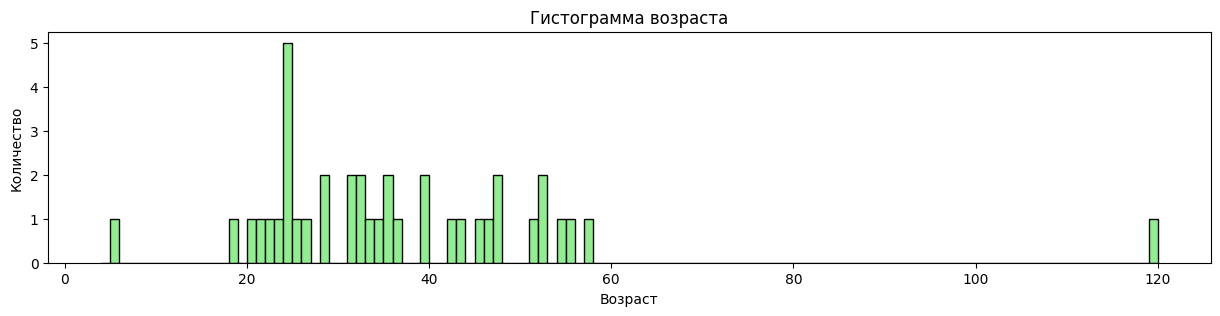

In [196]:
#Гистограмма для количественного признака (возраст):
ages = df['age'].dropna()

fig, ax = plt.subplots(figsize=(15, 3))
min_age = ages.min()
max_age = ages.max()
ax.hist(ages, bins=np.arange(min_age-1, max_age+1), color='lightgreen', edgecolor='black')
ax.set_title('Гистограмма возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')

plt.show()


На графике показано распределение возрастов пользователей (данные не очищены от записей со сомнительными значениями). Видно, что большинство людей возраста 25 лет. Можно оценить возраст аудитории.

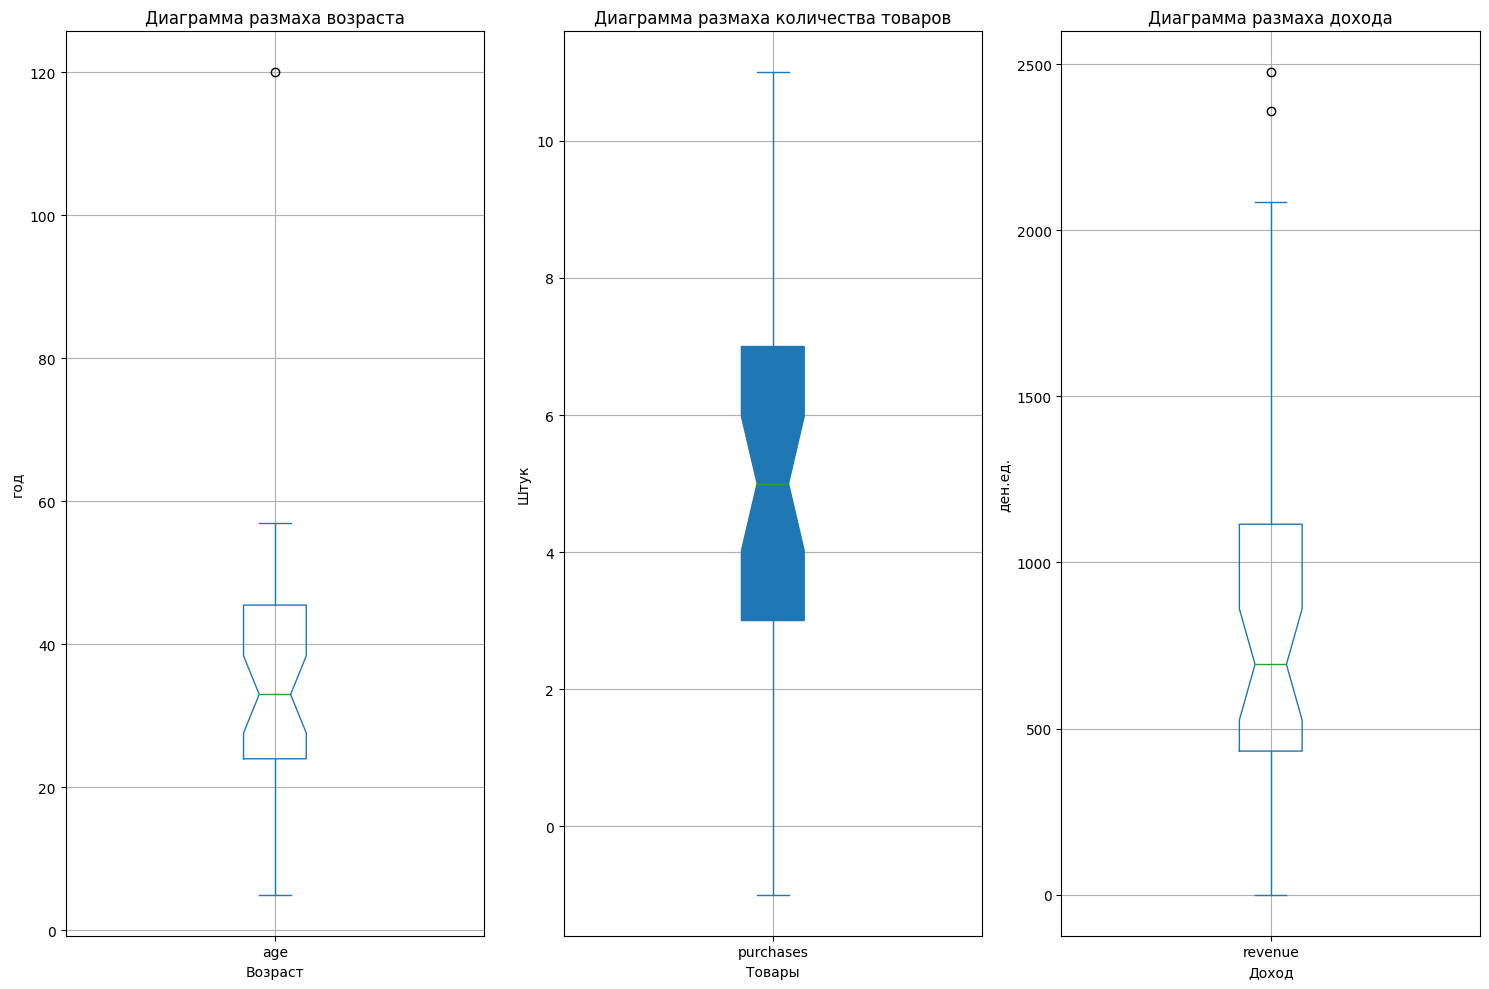

In [197]:
#боксплот (boxplot) для количественного признака () / диаграмма размаха
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

df['age'].plot.box(
    ax=ax1,
    patch_artist=False, #заливка
    notch = True, #доверительный интервал
    grid=True
)
df['purchases'].plot.box(
    ax=ax2,
    patch_artist=True, #заливка
    notch = True, #доверительный интервал
    grid=True
)
df['revenue'].plot.box(
    ax=ax3,
    patch_artist=False, #заливка
    notch = True, #доверительный интервал
    grid=True
)

ax1.set_title('Диаграмма размаха возраста')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('год')

ax2.set_title('Диаграмма размаха количества товаров')
ax2.set_xlabel('Товары')
ax2.set_ylabel('Штук')

ax3.set_title('Диаграмма размаха дохода')
ax3.set_xlabel('Доход')
ax3.set_ylabel('ден.ед.')

plt.tight_layout()
plt.show()

Видно, что график доходов и возраста имеет вержхние(правые) выбросы.
Медиана правого графика находится выше всех.
График дохода больше всех ассиметричен в правую (верхнюю) сторону.

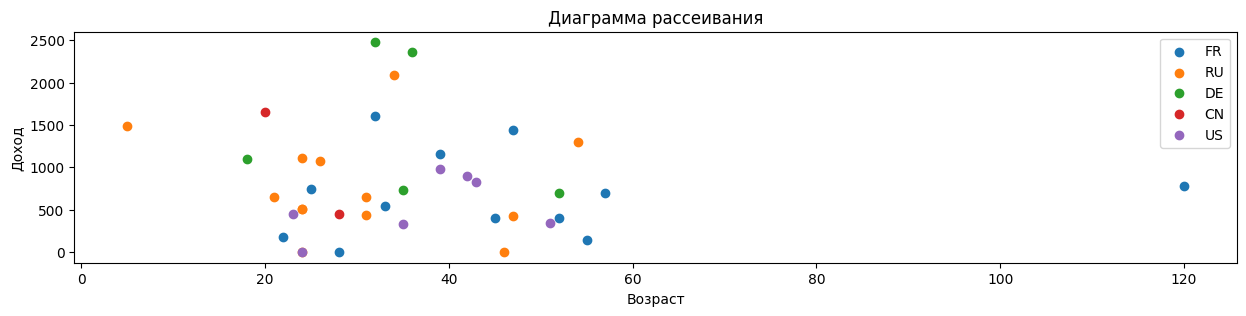

In [198]:
#scatter plot (диаграмма рассеяния) для пары количественных признаков
fig, ax = plt.subplots(figsize=(15, 3))

countries = df['country'].unique()
for c in countries:
  data = df[df['country'] == c]
  ax.scatter(x=data['age'],y=data['revenue'], label=c)

ax.legend(loc='upper right')
ax.set_title('Диаграмма рассеивания')
ax.set_xlabel('Возраст')
ax.set_ylabel('Доход')

plt.show()

График показывает распределения дохода в зависимости от возраста для пользователей каждой страны.
видно, что максимальный доход в возрасте от 20 до 40 лет получили граждане Германии

In [199]:
#Сохранение файлов
plt.savefig('C:\\Users\\AlenaK\\Documents\\5semester\\dpo\\dpo_ai_kononova\\homeworks\\HM02\\figures\\hist.png')
#Можно выполнить на своем пк
#Аналогично были сохранены все 3

<Figure size 640x480 with 0 Axes>